In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
import tensorflow as tf

### Cross Entropy Method

* Evolutionary Algorithm.
* Using it to solve CartPole problem


### Gym interface

The three main methods of an environment are
* `reset()`: reset environment to the initial state, _return first observation_
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, is_done, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `is_done`: True if the MDP has just finished, False if still in progress
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

In [33]:
import gym

env = gym.make("CartPole-v0")
env.reset()

#plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print('observation space:', env.observation_space)
print('action space:', env.action_space)
print('  - low:', env.observation_space.low)
print('  - high:', env.observation_space.high)
print("taking action")
new_obs, reward, is_done, _ = env.step(1)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

#All the paramters for controlling and monitoring the car

Observation space: Box(4,)
Action space: Discrete(2)
observation space: Box(4,)
action space: Discrete(2)
  - low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
  - high: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
taking action
new observation code: [-0.00414979  0.23180201 -0.00351029 -0.31335285]
reward: 1.0
is game over?: False


In [46]:
state = env.reset()

In [47]:
state

array([-0.03732974,  0.03338022,  0.04686804,  0.00293403])

In [36]:
env.observation_space.shape[0]

4

In [51]:
from keras_utils import reset_tf_session
s = reset_tf_session

In [52]:
model = Sequential()
model.add(Dense(16,activation = 'relu' , input_shape = (4,)))
model.add(Dense(2,activation = 'tanh'))

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [174]:
weights = [np.random.rand(*w.shape) for w in model.get_weights()]

In [202]:
mean = [np.zeros(w.shape) for w in model.get_weights()]

In [203]:
std = 1

In [204]:
print(model.get_weights()[1].shape)

(16,)


In [205]:
weights = [
            np.add(np.array(weights_init) , np.array([std*np.random.randn(*w.shape) 
            for w in model.get_weights()])) 
            for i in range(20)
]

In [206]:
weights[0]

array([array([[-1.26315767,  0.69011993,  0.31804821, -0.49914403,  0.6489798 ,
        -0.88106954,  0.61657283,  1.15138897, -0.65211733, -1.57485125,
         0.0833769 ,  0.89588342,  0.73214116,  2.26666744,  0.55844166,
        -0.29683441],
       [-0.82565524,  0.34663801,  0.25628904,  1.04260011,  1.93651704,
        -0.64894691, -0.89495604, -0.8358544 ,  0.7711841 ,  0.66003828,
        -0.77017052,  0.0307892 ,  0.68905553,  1.00094925,  0.23651562,
        -0.11759171],
       [ 0.36161346,  0.80977479, -1.2479993 ,  1.25527186,  0.40195816,
        -1.26589966,  1.16875557, -0.01405615, -0.36920128,  0.34461946,
        -0.04313797,  0.20134691,  0.36315711,  0.55104543, -0.71470453,
        -1.84376455],
       [ 1.58402457, -0.30544516,  0.43338137, -1.3213676 ,  0.07285404,
        -2.2651743 ,  0.87399223,  0.06605296,  1.1080823 , -0.3190304 ,
         0.45118978, -1.38926218,  0.73998732,  0.04387766, -0.16228556,
         0.47196093]]),
       array([-0.44733669, 

In [209]:
model.set_weights(weights[0])
state = state.reshape((1, 4))
y = model.predict_classes(state)

1/1 [==============================] - 0s


In [210]:
y

array([1], dtype=int64)

In [211]:
def evaluate(env , weights , model):

    total_reward = 0
    state = env.reset()
    model.set_weights(weights)
    for i in range(200):
        state = state.reshape((1, 4))
        action = model.predict_classes(state)
        obs , reward , is_done , info = env.step(action[0])
        total_reward += reward
        state = obs
    return total_reward
        

In [212]:
rewards = [evaluate(env , weight , model) for weight in weights]

1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s
 - 0s
1/1 [==============================] - 0s


1/1 [==============================] - 0s

1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [213]:
rewards

[10.0,
 159.0,
 9.0,
 10.0,
 9.0,
 9.0,
 73.0,
 10.0,
 10.0,
 10.0,
 26.0,
 10.0,
 10.0,
 14.0,
 8.0,
 10.0,
 10.0,
 124.0,
 10.0,
 18.0]

In [214]:
elite_set = sorted(rewards, reverse = True)[0:6]

In [215]:
elite_weights = [weights[rewards.index(elite_set[i])] for i in range(6)]

In [152]:
mean = np.array(elite_weights).mean(axis=0)

array([array([[-0.70556091,  0.39170523,  0.28206439,  0.38342444, -0.65113451,
        -0.23628635,  0.08845007,  0.32840026,  0.05677868,  0.04888182,
         1.04658546,  0.00724314, -0.44552926,  0.44661176, -0.04354786,
        -0.14212661],
       [-0.30087828, -0.93069884,  0.22717084, -0.21274459,  0.34496257,
         0.25474452, -0.43615336,  0.21051607,  0.13732226,  0.85685842,
         0.45938414,  0.92730804,  0.00727385,  0.20150175,  0.01850658,
        -0.47133196],
       [-0.23540641,  0.24986549, -0.48890123, -0.26211412, -0.82142572,
        -0.32872895, -0.25574543,  0.06477672, -0.0931578 , -0.18829295,
         1.11335858, -0.57624156,  0.74419867, -0.12709345,  0.22700935,
        -0.0233591 ],
       [-0.35544017,  0.01257263,  0.13837853, -0.63176023, -0.0057929 ,
        -1.23335109, -0.18713714, -0.52950826, -0.10453499, -0.22996366,
        -0.39803303, -0.16946988, -0.01035796, -0.16345505,  0.24187167,
         0.32304617]]),
       array([ 0.08891464, 

In [82]:
y

array([1], dtype=int64)

In [8]:
import random

NameError: name 'n_actions' is not defined

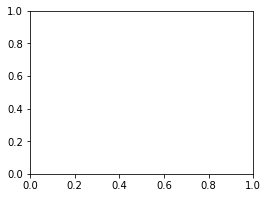

In [216]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

states, actions = [], []
total_reward = 0.

s = env.reset()

for t in range(10**4):
    plt.gca().clear()
    
        # Hint: you can use np.random.choice for sampling action
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    a = np.random.choice(n_actions ,1, p=policy[len(s)-1])[0]

    new_s, r, done, info = env.step(a)

        # Record information we just got from the environment.
    states.append(s)
    actions.append(a)
    total_reward += r

    s = new_s
    
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    #plt.imshow(env.render('rgb_array'))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)